In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image
import pandas as pd

### Review of lecture 13

In lecture 13 we learned

1) How to filter with Pandas

2) How to calculate great circle distances between two known points, and

3) How to format strings


### In this lecture we will:
1) Learn some more filtering tricks with Pandas

2) Learn how to make more complicated plots with **matplotlib**

3) Learn about the composition of the sun,  solar system and Earth.


### Filtering tricks with Pandas

We now turn to some plots of elemental abundances in the Sun and the Solar System.  I downloaded some data from Wikipedia (https://en.wikipedia.org/wiki/Abundances_of_the_elements_(data_page))
and processed them into a tab delimited file.  Let's use the Unix command head to take a peek at the data.

In [2]:
!head Datasets/ElementalAbundances/ElementalAbundances.txt


AtomicNumber	Symbol	Name	Solar	System
01	H	hydrogen	28000.0	28000.0
02	He	helium	2700.0	2700.0
03	Li	lithium	4e-07	5.7e-05
04	Be	beryllium	4e-07	7e-07
05	B	boron	1.1000000000000001e-05	2.1000000000000002e-05
06	C	carbon	10.0	10.0
07	N	nitrogen	3.1	3.1
08	O	oxygen	24.0	24.0
09	F	fluorine	0.001	0.0008500000000000001


The values are atomic mole fraction relative to Silicon. Si is 1.

The Solar System elemental abundances are from: Thomas J. Ahrens (ed.), Global Earth Physics : A Handbook of Physical Constants, American Geophysical Union (1995). ISBN 0-87590-851-9 Composition of the Solar System, Planets, Meteorites, and Major Terrestrial Reservoirs, Horton E. Newsom. Tables 1, 14, 15.

The values for the Sun are from:  National Physical Laboratory, Kaye and Laby Tables of Physical & Chemical Constants (2005). Section 3.1.3, Abundances of the elements

We can read in this file with **pd.read_csv( )** but  this is not a 'comma separated variable' file (that is what the **csv** stands for, but a tab delimited text file.  So, following the logic in Lecture 9 when we saved a file as a tab delimited format, we can   set the separation method (**sep**) to tabs ('\t') for reading in data.  And, we must tell Pandas that the header is in the first line (0). 

Note that there are lots of other ways of delimiting files, like with spaces. 
That is why in Lecture 9 we used **delim_whitespace=True**.  

In [3]:
Abundances=pd.read_csv('Datasets/ElementalAbundances/ElementalAbundances.txt',sep='\t',header=0)
Abundances.head()

,AtomicNumber,Symbol,Name,Solar,System
0,1,H,hydrogen,2.800000e+04,2.800000e+04
1,2,He,helium,2.700000e+03,2.700000e+03
2,3,Li,lithium,4.000000e-07,5.700000e-05
3,4,Be,beryllium,4.000000e-07,7.000000e-07
4,5,B,boron,1.100000e-05,2.100000e-05


### More Plotting techniques

We have successfully read in the file.  Now let's plot the Atomic Number versus the Elemental Abundances in the Sun.

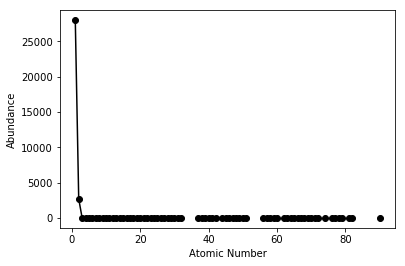

In [4]:
plt.plot(Abundances.AtomicNumber,(Abundances.Solar),'k-') # plot with a black line
plt.plot(Abundances.AtomicNumber,(Abundances.Solar),'ko') # put on some black dots
plt.xlabel('Atomic Number') # label the x axis
plt.ylabel('Abundance'); # label the y axis

Well that's odd - only the first two elements, Hydrogen and Helium, appear significant.  The Sun is primarily H and He, so this is actually expected, but it isn't what we want! We would like to see the other elements as well. We can do this by taking the logarithm of the abundances instead of the abundances.  We'll use the **NumPy** function **np.log10( )**.  Note that **np.log( )** returns the natural log, while **np.log10( )** returns the base 10 log.  

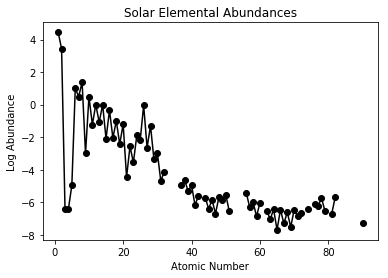

In [5]:
plt.plot(Abundances.AtomicNumber,np.log10(Abundances.Solar),'k-')
plt.plot(Abundances.AtomicNumber,np.log10(Abundances.Solar),'ko')
plt.xlabel('Atomic Number')
plt.ylabel('Log Abundance')
plt.title('Solar Elemental Abundances');

That's better. Let's keep improving this plot. We could place the symbols above the points.  To do this, we will convert the Series of symbols to a list, go through them with a for loop, and then plot them  above the dots with our old frient **plt.text( )** from Lecture 9.  

To convert from a Pandas **Series** (a column in the Pandas DataFrame) to a list, we use the method **Series.tolist()** (which is similar to the **NumPy** method that we already saw):

In [6]:
print(Abundances.AtomicNumber.tolist()) #convert Series to list

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94]


So let's export the Symbols and abundances  to lists as well.  

In [7]:
syms=Abundances.Symbol.tolist() # list of symbols
print (syms)
Xs=Abundances.AtomicNumber.tolist()
print (Xs)
Ys=Abundances.Solar.tolist() # list of soloar abundances
print (Ys)


['H', 'He', 'Li', 'Be', 'B', 'C', 'N', 'O', 'F', 'Ne', 'Na', 'Mg', 'Al', 'Si', 'P', 'S', 'Cl', 'Ar', 'K', 'Ca', 'Sc', 'Ti', 'V', 'Cr', 'Mn', 'Fe', 'Co', 'Ni', 'Cu', 'Zn', 'Ga', 'Ge', 'As', 'Se', 'Br', 'Kr', 'Rb', 'Sr', 'Y', 'Zr', 'Nb', 'Mo', 'Tc', 'Ru', 'Rh', 'Pd', 'Ag', 'Cd', 'In', 'Sn', 'Sb', 'Te', 'I', 'Xe', 'Cs', 'Ba', 'La', 'Ce', 'Pr', 'Nd', 'Pm', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Hf', 'Ta', 'W', 'Re', 'Os', 'Ir', 'Pt', 'Au', 'Hg', 'Tl', 'Pb', 'Bi', 'Po', 'At', 'Rn', 'Fr', 'Ra', 'Ac', 'Th', 'Pa', 'U', 'Np', 'Pu']
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94]
[28000.0, 2700.0, 4e-07, 4e-07, 1.1e-05, 10.0, 3.1, 24.0, 0.001, 3.0, 0.06, 1.0, 

But wait, what are those 'nan's in the Y values?  

'nan' stands for 'not a number'. 

If you look in the file, you will see that these cells are blank. Pandas converted all the blanks to 'nan's, but we really want to skip those lines for which we have no data. 

No problem! 

We can filter the data file by removing the 'nan' records in the Solar abundances Series. 

To do this, we use the Pandas method **dropna( )**.  

In [9]:
Solar=Abundances.dropna(subset=['Solar']) # drop all the records with blank abundances
print (Solar.Solar.tolist())

[28000.0, 2700.0, 4e-07, 4e-07, 1.1e-05, 10.0, 3.1, 24.0, 0.001, 3.0, 0.06, 1.0, 0.083, 1.0, 0.008, 0.45, 0.009000000000000001, 0.1, 0.0037, 0.064, 3.5000000000000004e-05, 0.0027, 0.00028, 0.013, 0.006900000000000001, 0.9, 0.0023, 0.05, 0.00045, 0.0011, 2.1e-05, 7.2e-05, 1.1e-05, 2.2000000000000006e-05, 4.9000000000000005e-06, 1.12e-05, 7e-07, 2.3e-06, 1.9e-06, 4e-07, 1.4e-06, 2e-07, 2e-06, 1.3e-06, 3e-06, 3e-07, 3.8e-06, 5e-07, 1e-06, 1.3999999999999998e-07, 9.000000000000001e-07, 3e-07, 9e-08, 3.7e-07, 2e-08, 3.5e-07, 5e-08, 2.4e-07, 3.0000000000000004e-08, 3.4e-07, 1.5e-07, 2.1e-07, 3.6e-07, 8e-07, 6e-07, 1.8000000000000001e-06, 3e-07, 2e-07, 2e-06, 5e-08]


See - all the nasty 'nan's are gone!  

But now we have to re-generate our lists from the filtered DataFrame **Solar**

In [10]:
syms=Solar.Symbol.tolist() # get the symbols exported to a list
Xs=Solar.AtomicNumber.tolist()
Ys=np.log10(Solar.Solar).tolist() # Don't forget to take the log value!


Another solution for getting rid of 'nan's is replace them with zeros and then filter with the condition !=0 or something. 

To replace blanks with a number, we  can use the **fillna()** method which does just that.   Which of the two you use depends on what you need.   



### Practice with Pandas filtering
- read in the solar abundances in a new DataFrame (your choice of name).
- change all the blank records (nan) to zeros, instead of dropping them.
- replot the data using blue triangles and a blue dashed line.  
- add a legend in the upper right hand corner. 

Now that we have rid ourselves of the blank values, we can label the points with  the list of symbols using the  **plt.text( )** function.  

We can tell **plt.text( )** that we want the vertical alignment (**va**) on the bottom and we want to center the horizontal alignment (**ha**).    Here's how it goes. 

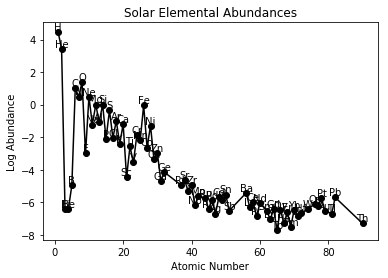

In [11]:
# do the usual 
plt.plot(Solar.AtomicNumber,np.log10(Solar.Solar),'k-')
plt.plot(Solar.AtomicNumber,np.log10(Solar.Solar),'ko')
plt.xlabel('Atomic Number')
plt.ylabel('Log Abundance')
plt.title('Solar Elemental Abundances');

for k in range(len(syms)): # walk through the syms list
    plt.text(Xs[k],Ys[k],syms[k],va='bottom',ha='center') # here's how you do the notes:

Close - but the labels are too close to the data points, so let's "scootch" them up. We can also rotate them as we did in Lecture 9.  Finally, we can set the fontsize using a keyword argument: 


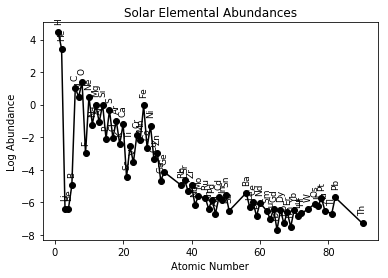

In [12]:
plt.plot(Solar.AtomicNumber,np.log10(Solar.Solar),'k-')
plt.plot(Solar.AtomicNumber,np.log10(Solar.Solar),'ko')
plt.xlabel('Atomic Number')
plt.ylabel('Log Abundance')
plt.title('Solar Elemental Abundances')
scootch=.5
for k in range(len(syms)):
    plt.text(Xs[k],Ys[k]+scootch,syms[k],va='bottom',ha='center',rotation=90,fontsize=9)

Having the labels above the dots is one way to do this.  Another solution would be to write the labels on the X axis.  We do that with **plt.xticks( )**. Setting the _rotation_ keyword to 90 puts the tick labels on sideways (similar to how we did it for plt.text).  


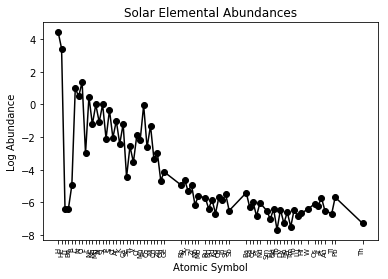

In [13]:
plt.plot(Solar.AtomicNumber,np.log10(Solar.Solar),'k-')
plt.plot(Solar.AtomicNumber,np.log10(Solar.Solar),'ko')
plt.xlabel('Atomic Symbol')
plt.ylabel('Log Abundance')
plt.title('Solar Elemental Abundances')
plt.xticks(Xs,syms,rotation=90,fontsize=7);# see how we rotate the xticks

Now let's look at the Solar System Abundances. We'll apply the same strategy.

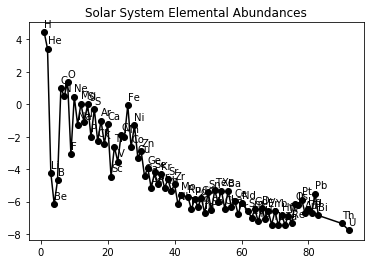

In [14]:
System=Abundances.dropna(subset=['System'])
syms=System.Symbol.tolist()
Xs=System.AtomicNumber.values.tolist()
Ys=np.log10(System.System).tolist() # Don't forget to take the log value!
plt.plot(Xs,Ys,'k-')
plt.plot(Xs,Ys,'ko')
plt.title('Solar System Elemental Abundances')
scootch=.2
for k in range(len(syms)):
    plt.text(Xs[k],Ys[k]+scootch,syms[k],va='bottom',ha='left')

### Practice with Matplotlib.pyplot and pyplot.text() 
- Use the **head( )** to peek at the data in the file:
    "Datasets/Tides/SDtides.txt"
- import the data into a pandas DataFrame
    - the data file contains information about High and Low Tides measured at SIO
- plot a line chart of high tide (cm) for the first 60 days of the year 
    - include a title, x-axis label, and y-axis label
- write the time at high tide above each point (make sure to rotate it)
- add a line chart of low tide (cm) to the same plot
- include a legend in your figure

Back to our elemental abundances, we'll take a look at one final example - the Earth's crust.   You can find the data in: Datasets/ElementalAbundances/CrustalAbundances.txt

Let's take a peek:

In [15]:
!head Datasets/ElementalAbundances/CrustalAbundances.txt

AtomicNumber	Symbol	Name	Crust	SiNormalized
1	H	hydrogen	0.0014	0.004964539
2	He	helium	8.00E-09	2.84E-08
3	Li	lithium	2.00E-05	7.09E-05
4	Be	beryllium	2.80E-06	9.93E-06
5	B	boron	1.00E-05	3.55E-05
6	C	carbon	0.0002	0.00070922
7	N	nitrogen	1.90E-05	6.74E-05
8	O	oxygen	0.461	1.634751773
9	F	fluorine	0.000585	0.002074468


And read, filter and plot   as before.

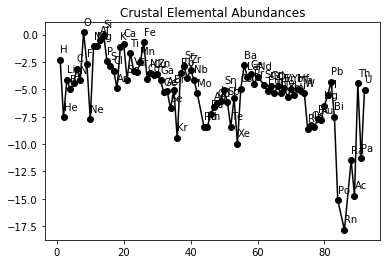

In [16]:
CrustalAbundances=pd.read_csv('Datasets/ElementalAbundances/CrustalAbundances.txt',\
                              sep='\t',header=0) # read in the data
Crust=CrustalAbundances.dropna(subset=['SiNormalized']) # drop the blanks
syms=Crust.Symbol.tolist() # export the Symbol Series to syms
Xs=Crust.AtomicNumber.tolist()
Ys=np.log10(Crust.SiNormalized).tolist() # Don't forget to take the log value!
plt.plot(Xs,Ys,'k-')
plt.plot(Xs,Ys,'ko')
plt.title('Crustal Elemental Abundances')
scootch=.5 # pad the Y axis with scootch
for k in range(len(syms)):
    plt.text(Xs[k],Ys[k]+scootch,syms[k],va='bottom',ha='left')

Wow! that looks different!    Where did all the Hydrogen and Helium go?  

To get a better comparison among the resevoirs, it would be handy to plot all three images on one figure.  There are lots of ways to accomplish this, for example making a stacked plot with the figures on top of each other, or three side-by-side, or other ways.  Here we want three on stacked vertically.  

But first, it is time to learn about  **plt.figure()**.  This command creates a **figure** instance that has many useful  methods, among them the ability to change the dimensions of the plot.  This is done by passing a tuple with width and height as a parameter.    



In [18]:
fig=plt.figure(1,(5,15)) # 1 is the number of the plot and fig is the name of the plot object
# the (5,15) tuple is the size (width,height)

One of the methods of a figure instance is **add_subplot(row,column,plot_number)**.  

So we want 3 rows, one column and we will add subplots in order (1-3).   

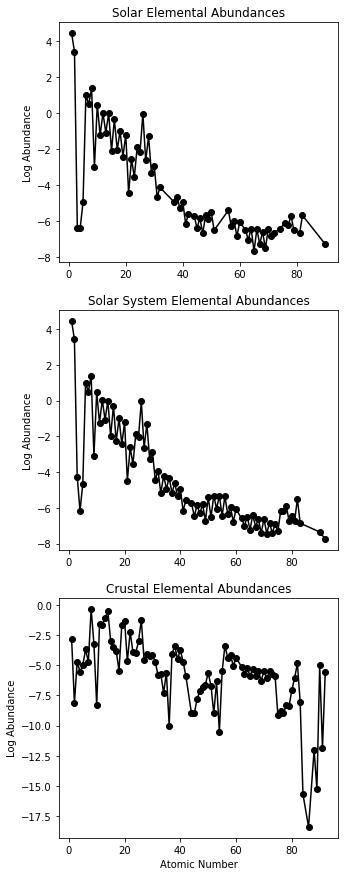

In [19]:
fig=plt.figure(1,(5,15)) # figure instance
fig.add_subplot(3,1,1) # the 3,1,1 means three rows, one column,  and this is the first plot. 
plt.plot(Solar.AtomicNumber,np.log10(Solar.Solar),'k-')
plt.plot(Solar.AtomicNumber,np.log10(Solar.Solar),'ko')
plt.title("Solar Elemental Abundances")
plt.ylabel('Log Abundance')
fig.add_subplot(3,1,2) # this makes the second plot of three in one column
plt.plot(System.AtomicNumber,np.log10(System.System),'k-')
plt.plot(System.AtomicNumber,np.log10(System.System),'ko')
plt.title("Solar System Elemental Abundances")
plt.ylabel('Log Abundance')
fig.add_subplot(3,1,3) # and here comes the third plot.  
plt.plot(Crust.AtomicNumber,np.log10(Crust.Crust),'k-')
plt.plot(Crust.AtomicNumber,np.log10(Crust.Crust),'ko')
plt.title("Crustal Elemental Abundances")
plt.ylabel('Log Abundance')
plt.xlabel('Atomic Number'); # the xlabel comes here because the 3rd plot is the lowest


Other ways of setting up plots are possible and we will learn about some of them in later lectures.  If you are interested, see: http://matplotlib.org/api/pyplot_api.html.  



### Practice with     Matplotlib.pyplot.figure.add_subplot()
- use **add_subplot( )** to plot High tide (cm) for the first 60 days and Low tide (cm) for the first 60 days in two subplots.    

How else can we represent the crustal abundance data? Some folks love pie charts.  We can create a pie chart of the most abundant elements in the crust. To do this, we should probably  filter for the most abundant elements.   

So  we'll begin by sorting the Crustal abundances into descending order.  The Pandas **DataFrame**  has a method **sort_values( )** which is perfect for this.   **DataFrame.sort_values( )** has some keywords that are handy:

**by= **  sets the column name (Series) that you want to sort on. 

**ascending= ** If set to True (the default), Pandas will sort from smallest to largest.  If set to False, it will sort from largest to smallest (which is what we want).  

To see how this works, let's try it out, doing a descending sort on the Crust value:

In [20]:
Crust.sort_values(by="Crust", ascending=False).head(14) # the head method gives us the top 14.

,AtomicNumber,Symbol,Name,Crust,SiNormalized
7,8,O,oxygen,0.461000,1.634752
13,14,Si,silicon,0.282000,1.000000
12,13,Al,aluminium,0.082300,0.291844
25,26,Fe,iron,0.056300,0.199645
19,20,Ca,calcium,0.041500,0.147163
10,11,Na,sodium,0.023600,0.083688
11,12,Mg,magnesium,0.023300,0.082624
18,19,K,potassium,0.020900,0.074113
21,22,Ti,titanium,0.005650,0.020035
0,1,H,hydrogen,0.001400,0.004965


Here we see that abundances less than about 1% are trivial, so let's filter Crust for values > .01

In [21]:
Top=Crust[Crust.Crust>.01] # this takes all the values with Crust >0.01
Top

,AtomicNumber,Symbol,Name,Crust,SiNormalized
7,8,O,oxygen,0.4610,1.634752
10,11,Na,sodium,0.0236,0.083688
11,12,Mg,magnesium,0.0233,0.082624
12,13,Al,aluminium,0.0823,0.291844
13,14,Si,silicon,0.2820,1.000000
18,19,K,potassium,0.0209,0.074113
19,20,Ca,calcium,0.0415,0.147163
25,26,Fe,iron,0.0563,0.199645


And now, drum roll, for the pie chart.   We can use **plt.pie( )** to make the chart.  It has a keyword argument **labels=** which takes a list.  This  allows us to label all the slices with a list of the symbols as shown here:

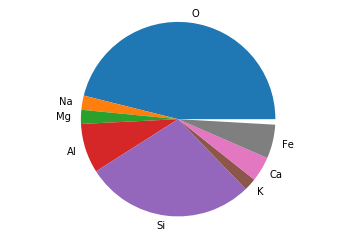

In [22]:
plt.pie(Top.Crust,labels=Top.Symbol.tolist()) # see the labels trick?  
plt.axis('equal'); # for some reason the pie is not round by default.  this makes it round

But now the elements do not sum to 1, so we should probably renormalize them.  To do that, we must first sum up all the values, then divide them all by the sum.  

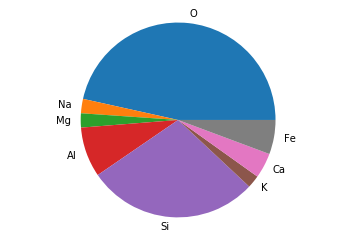

In [23]:
total= Top.Crust.sum() # the sum() method takes the sum of the Series - duh. 
Normalized=Top.Crust/total # makes a Series that is normalized by the sum
syms=Top.Symbol.tolist()
plt.pie(Normalized,labels=syms)
plt.axis('equal');

Some people love pie charts while others like bar charts better.  So let's look at the data  as a bar chart. 

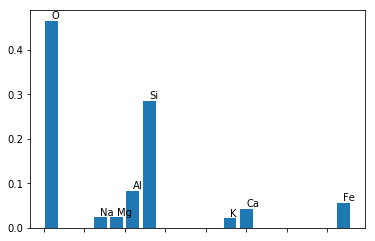

In [24]:
nums=Top.AtomicNumber.tolist() # get a list of Atomic Numbers
plt.bar(nums,Normalized) # this makes the bar chart
plt.xticks(visible=False) # HA!  we can turn the x tick labels off!

for k in range(len(syms)): # and label the bars this way instead
    plt.text(nums[k] ,Normalized.tolist()[k],syms[k],va='bottom',ha='left')
# notice how we had to turn the Series Normalized into a list for this

### Practice with Bar charts
- use **.bar( ) ** to plot the height at low tide for the first 60 days of the year
- include a title, x-axis label, y-axis label, and the time that low tide occured